In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pathlib
from sklearn import preprocessing 
import ipywidgets as widgets


# Read

In [3]:
PATH = pathlib.Path("./data")

In [4]:
weather = pd.read_csv(PATH / "Погода_2016_2020.csv")
energy = pd.read_csv(PATH / "Энергопотребление_2016_2020.csv")

# Preprocessing

In [5]:
energy.sample(3)

,StartDate,Value (kWh),day_of_week,notes
14148,2018-11-01 12:00:00,0.248,3,weekday
9700,2017-10-07 04:00:00,0.279,5,weekend
31835,2020-01-18 11:00:00,0.341,5,weekend


In [6]:
weather.sample(3)

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
777,2018-07-18,18,96,87.5,79,78,75.8,72,94,70.1,46,12,6.5,0,29.9,29.9,29.8,0.0,2
568,2017-12-21,21,79,67.3,49,71,62.3,49,100,84.8,68,14,6.8,0,29.9,29.8,29.8,0.0,3
809,2018-08-19,19,97,87.2,80,78,75.8,70,94,71.1,44,13,7.0,0,29.8,29.8,29.7,0.0,6


In [7]:
print(f"Weather: {weather['Date'][0]:<22} {weather['Date'][weather.shape[0] - 1]:<22} shape: {weather.shape[0]}")
print(f"Energy:  {energy['StartDate'][0]:<22} {energy['StartDate'][energy.shape[0] - 1]:<22} shape: {energy.shape[0]}\n")

Weather: 2016-01-06             2020-08-30             shape: 1552
Energy:  2016-01-06 00:00:00    2020-07-07 23:00:00    shape: 35952



In [8]:
weather["Date"] = pd.date_range("2016-06-01", "2020-08-30")
energy["StartDate"] = pd.date_range("2016-06-01 00:00:00", "2020-07-07 23:00:00", freq="1h")

In [9]:
print(f"Weather: {str(weather['Date'][0]):<22} {str(weather['Date'][weather.shape[0] - 1]):<22} shape: {weather.shape[0]}")
print(f"Energy:  {str(energy['StartDate'][0]):<22} {str(energy['StartDate'][energy.shape[0] - 1]):<22} shape: {energy.shape[0]}\n")

Weather: 2016-06-01 00:00:00    2020-08-30 00:00:00    shape: 1552
Energy:  2016-06-01 00:00:00    2020-07-07 23:00:00    shape: 35952



In [10]:
(weather["Date"].dt.day == weather["Day"]).all()

True

In [11]:
weather.sample(3)

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
264,2017-02-20,20,71,63.0,58,68,61.0,57,97,92.8,86,24,8.3,0,29.9,29.9,29.8,0.0,0
790,2018-07-31,31,87,79.4,73,80,75.8,72,100,89.1,72,36,7.0,0,29.9,29.9,29.8,0.0,1
1525,2020-08-04,4,97,86.0,78,78,73.3,70,87,67.5,44,23,6.0,0,29.9,29.9,29.8,0.0,2


In [12]:
energy.sample(3)

,StartDate,Value (kWh),day_of_week,notes
27017,2019-07-01 17:00:00,1.485,0,weekday
10301,2017-08-04 05:00:00,0.223,5,weekend
14806,2018-02-07 22:00:00,0.337,0,weekday


In [13]:
energy["notes"].unique()

array(['weekday', 'weekend', 'vacation', 'COVID_lockdown'], dtype=object)

In [14]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   StartDate    35952 non-null  datetime64[ns]
 1   Value (kWh)  35952 non-null  float64       
 2   day_of_week  35952 non-null  int64         
 3   notes        35952 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [15]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1552 non-null   datetime64[ns]
 1   Day          1552 non-null   int64         
 2   Temp_max     1552 non-null   int64         
 3   Temp_avg     1552 non-null   float64       
 4   Temp_min     1552 non-null   int64         
 5   Dew_max      1552 non-null   int64         
 6   Dew_avg      1552 non-null   float64       
 7   Dew_min      1552 non-null   int64         
 8   Hum_max      1552 non-null   int64         
 9   Hum_avg      1552 non-null   float64       
 10  Hum_min      1552 non-null   int64         
 11  Wind_max     1552 non-null   int64         
 12  Wind_avg     1552 non-null   float64       
 13  Wind_min     1552 non-null   int64         
 14  Press_max    1552 non-null   float64       
 15  Press_avg    1552 non-null   float64       
 16  Press_

In [16]:
energy.rename({"StartDate": "Date"}, inplace=True, axis=1)

# Mergin

In [17]:
energy.shape, weather.shape

((35952, 4), (1552, 19))

In [18]:
data = pd.merge(left=energy, right=weather, how="inner", on=["Date", "day_of_week"])

In [19]:
data.shape

(1498, 21)

In [20]:
data.head(3)

,Date,Value (kWh),day_of_week,notes,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,...,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit
0,2016-06-01,1.057,2,weekday,1,85,74.8,68,74,71.4,...,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00
1,2016-06-02,1.281,5,weekend,2,76,71.2,66,74,70.3,...,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33
2,2016-06-03,0.736,6,weekend,3,79,72.1,68,72,70.0,...,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18


In [21]:
data.set_index("Date", inplace=True)

In [22]:
data.columns

Index(['Value (kWh)', 'day_of_week', 'notes', 'Day', 'Temp_max', 'Temp_avg',
       'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max', 'Hum_avg',
       'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Press_max', 'Press_avg',
       'Press_min', 'Precipit'],
      dtype='object')

# Importance exploration

In [23]:
corr = data.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,Value (kWh),day_of_week,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit
Value (kWh),1.000000,0.017829,-0.040117,0.602765,0.617767,0.610625,0.544454,0.558716,0.560434,0.123055,0.024436,-0.020046,0.026023,-0.133414,-0.104931,-0.341108,-0.268236,-0.029498,-0.008986
day_of_week,0.017829,1.000000,-0.002588,0.020255,0.019368,0.017839,0.020858,0.017325,0.009499,-0.001444,-0.000932,-0.003558,0.009471,0.003540,-0.030861,-0.008365,-0.020566,0.021412,-0.003220
Day,-0.040117,-0.002588,1.000000,0.005967,0.000755,-0.001977,0.002429,-0.000676,-0.006322,-0.003976,-0.005951,-0.017581,0.070071,0.048668,0.019761,-0.041066,-0.029535,0.026205,0.027902
Temp_max,0.602765,0.020255,0.005967,1.000000,0.970671,0.896819,0.853261,0.863508,0.834735,0.198014,0.009409,-0.115138,-0.017668,-0.233705,-0.222661,-0.641610,-0.538695,-0.041621,-0.034092
Temp_avg,0.617767,0.019368,0.000755,0.970671,1.000000,0.964856,0.907404,0.927545,0.902473,0.217103,0.105836,0.032589,0.029039,-0.142861,-0.135562,-0.681656,-0.577216,-0.065150,0.001527
Temp_min,0.610625,0.017839,-0.001977,0.896819,0.964856,1.000000,0.899193,0.937564,0.940381,0.221901,0.211626,0.165240,0.060535,-0.071067,-0.044836,-0.677092,-0.563582,-0.077089,0.045736
Dew_max,0.544454,0.020858,0.002429,0.853261,0.907404,0.899193,1.000000,0.970852,0.904039,0.489682,0.443943,0.334323,0.133957,-0.050420,-0.090190,-0.700926,-0.633840,-0.091189,0.075256
Dew_avg,0.558716,0.017325,-0.000676,0.863508,0.927545,0.937564,0.970852,1.000000,0.968535,0.470792,0.466556,0.365303,0.078595,-0.094989,-0.092529,-0.711440,-0.619705,-0.091366,0.073098
Dew_min,0.560434,0.009499,-0.006322,0.834735,0.902473,0.940381,0.904039,0.968535,1.000000,0.415608,0.437150,0.363220,0.026391,-0.126508,-0.090757,-0.682932,-0.560050,-0.085538,0.078316
Hum_max,0.123055,-0.001444,-0.003976,0.198014,0.217103,0.221901,0.489682,0.470792,0.415608,1.000000,0.763141,0.511610,-0.011091,-0.176681,-0.197516,-0.306529,-0.305726,-0.081099,0.124446


In [24]:
data.groupby("notes")[["Value (kWh)"]].mean()

,Value (kWh)
notes,
COVID_lockdown,0.885010
vacation,0.488231
weekday,0.979304
weekend,0.977197


In [25]:
corr_row = corr["Value (kWh)"].replace(1, 0)
(feature := corr_row.idxmax())

'Temp_avg'

The most important feature is **Temp_avg**

# UI

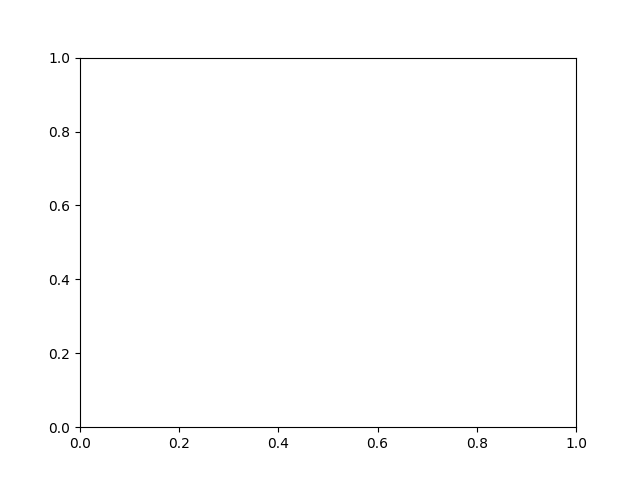

In [28]:
%matplotlib inline
%matplotlib widget
output = widgets.Output()

fig, ax = plt.subplots(1, 1)

def on_button_clicked(button):
    # output.clear_output()
    with output:
        date_range_descr.value = f"{date_from.value}, {date_to.value}"
        x = np.linspace(0, 6, 200)
        y = np.sin(x) + np.random.randn(200) / 5
        ax.cla()  
        ax.plot(x, y)


date_from = widgets.DatePicker(description='Start', disabled=False)
date_to = widgets.DatePicker(description='Stop', disabled=False)
description = widgets.Label(value="Select date range from to")
date_range_descr = widgets.Label(value="From To")
run_button = widgets.Button(
    description='Plot graph',
    disabled=False,
    # button_style=''
)
run_button.on_click(on_button_clicked)


w_box = widgets.HBox(
    [date_from, date_to]
)
wid = widgets.VBox(
    [description, w_box, run_button, date_range_descr, output]
)
wid

Sines(children=(VBox(children=(IntSlider(value=1, description='freq', max=10), ColorPicker(value='#FF00DD', de…

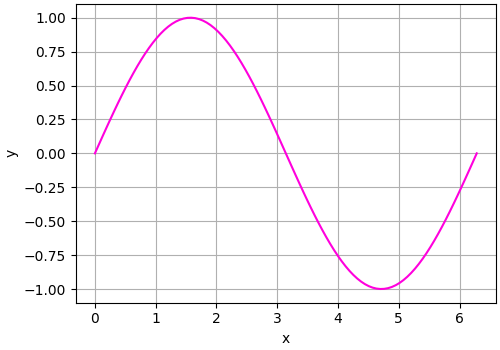

In [29]:
def make_box_layout():
     return widgets.Layout(
        border='solid 1px black',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px'
     )
 
class Sines(widgets.HBox):
     
    def __init__(self):
        super().__init__()
        output = widgets.Output()
 
        self.x = np.linspace(0, 2 * np.pi, 100)
        initial_color = '#FF00DD'
 
        with output:
            self.fig, self.ax = plt.subplots(constrained_layout=True, figsize=(5, 3.5))
        self.line, = self.ax.plot(self.x, np.sin(self.x), initial_color)
         
        self.fig.canvas.toolbar_position = 'bottom'
        self.ax.grid(True)
 
        # define widgets
        int_slider = widgets.IntSlider(
            value=1, 
            min=0, 
            max=10, 
            step=1, 
            description='freq'
        )
        color_picker = widgets.ColorPicker(
            value=initial_color, 
            description='pick a color'
        )
        text_xlabel = widgets.Text(
            value='', 
            description='xlabel', 
            continuous_update=False
        )
        text_ylabel = widgets.Text(
            value='', 
            description='ylabel', 
            continuous_update=False
        )
 
        controls = widgets.VBox([
            int_slider, 
            color_picker, 
            text_xlabel, 
            text_ylabel
        ])
        controls.layout = make_box_layout()
         
        out_box = widgets.Box([output])
        output.layout = make_box_layout()
 
        # observe stuff
        int_slider.observe(self.update, 'value')
        color_picker.observe(self.line_color, 'value')
        text_xlabel.observe(self.update_xlabel, 'value')
        text_ylabel.observe(self.update_ylabel, 'value')
         
        text_xlabel.value = 'x'
        text_ylabel.value = 'y'
         
 
        # add to children
        self.children = [controls, output]
     
    def update(self, change):
        """Draw line in plot"""
        self.line.set_ydata(np.sin(change.new * self.x))
        self.fig.canvas.draw()
 
    def line_color(self, change):
        self.line.set_color(change.new)
 
    def update_xlabel(self, change):
        self.ax.set_xlabel(change.new)
 
    def update_ylabel(self, change):
        self.ax.set_ylabel(change.new)
         
         
Sines()